# Multi-class Classification and Neural Networks
Created by Quan on 2019/1/12.  

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [101]:
data = sio.loadmat('ex3data1')
X = data.get('X')
# transpose
X = np.array([image.reshape(20, 20).T.reshape(-1) for image in X])
y = data.get('y').reshape(-1)

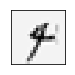

In [102]:
pick_one = np.random.randint(0, 5000)
fig, ax = plt.subplots(figsize=(1, 1))
ax.matshow(X[pick_one, :].reshape(20, -1), cmap=matplotlib.cm.binary)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
plt.show()

In [103]:
def plot_100_images(X):
    # X:(5000, 400)
    size = int(np.sqrt(X.shape[1]))
    
    sample_idx = np.random.choice(X.shape[0], 100)
    sample_image = X[sample_idx, :]
    fig, ax_array = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(8, 8))
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_image[10 * r + c].reshape(size, size), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

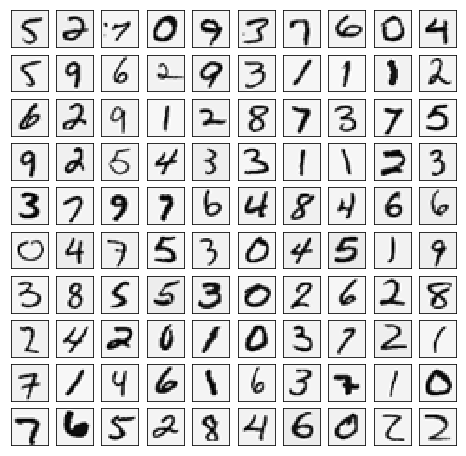

In [104]:
plot_100_images(X)
plt.show()

## 准备数据

In [105]:
X = np.insert(X, 0, 1, axis=1)
X.shape

(5000, 401)

In [106]:
new_y = []
for k in [10] + list(range(1, 10)):
    new_y.append((y == k).astype(int))
y = np.array(new_y).T
y.shape

(5000, 10)

In [107]:
def hypothesis(X, theta):
    h = 1 / (1 + np.exp(-(X @ theta)))
    return h

In [108]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [109]:
def cost(theta, X, y):
    m = len(X)
    h = hypothesis(X, theta)
    J = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

In [110]:
def regularized_cost(theta, X, y, l=1):
    m = len(X)
    # theta is a vector
    theta_j1_to_jn = theta[1:]
    regularized_term = (l / (2 * m)) * np.sum(theta_j1_to_jn ** 2)
    return cost(theta, X, y) + regularized_term

In [111]:
def gradient(theta, X, y):
    m = len(X)
    g = (hypothesis(X, theta) - y).T @ X / m
    return g

In [112]:
def regularized_gradient(theta, X, y, l=1):
    m = len(X)
    theta_j1_to_jn = theta[1:]
    regularized_term = np.concatenate((np.array([0]), l / m * theta_j1_to_jn))
    return gradient(theta, X, y) + regularized_term

In [113]:
def logistic_regression(X, y, l=1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y, l), method='TNC', jac=regularized_gradient)
    final_theta = res.x
    return final_theta

In [114]:
def predict(X, theta):
    return (hypothesis(X, theta) >= 0.5).astype(int)

## 训练一元分类模型：图中数字是否为0

In [115]:
t0 = logistic_regression(X, y[:, 0], l=1)
print(t0.shape)
y_pred = predict(X, t0)
print('accuracy: {}'.format(np.mean(y_pred == y[:, 0])))

(401,)
accuracy: 0.9974


## 训练多元分类模型

In [116]:
k_theta = np.array([logistic_regression(X, y[:, k], l=1) for k in range(10)])
print(k_theta.shape)

(10, 401)


In [117]:
prob_array = sigmoid(X @ k_theta.T)
np.set_printoptions(suppress=True)
prob_array

array([[0.99577469, 0.        , 0.00053469, ..., 0.00006468, 0.00003907,
        0.00172248],
       [0.99834593, 0.0000001 , 0.00005609, ..., 0.0000968 , 0.0000029 ,
        0.0000849 ],
       [0.99139887, 0.        , 0.00056791, ..., 0.00000655, 0.02653937,
        0.00197511],
       ...,
       [0.00000068, 0.04136229, 0.00321061, ..., 0.00012719, 0.00297244,
        0.70761014],
       [0.00001843, 0.00000013, 0.00000009, ..., 0.00164816, 0.06820813,
        0.86107438],
       [0.02879974, 0.        , 0.00012964, ..., 0.36611646, 0.00497114,
        0.14828768]])

In [118]:
y_pred = np.argmax(prob_array, axis=1)
y_pred

array([0, 0, 0, ..., 9, 9, 7])

In [119]:
data = sio.loadmat('ex3data1')
y = data.get('y').reshape(-1)
y.shape

(5000,)

In [120]:
y_answer = y.copy()
y_answer[y_answer == 10] = 0
y_answer

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [121]:
print(classification_report(y_answer, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       500
          1       0.95      0.99      0.97       500
          2       0.95      0.92      0.93       500
          3       0.95      0.91      0.93       500
          4       0.95      0.95      0.95       500
          5       0.92      0.92      0.92       500
          6       0.97      0.98      0.97       500
          7       0.95      0.95      0.95       500
          8       0.93      0.92      0.92       500
          9       0.92      0.92      0.92       500

avg / total       0.94      0.94      0.94      5000



## 神经网络模型

In [122]:
#隐藏层有25个神经元
data = sio.loadmat('ex3weights')
theta1, theta2 = data['Theta1'], data['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [123]:
#theta是根据原来数据训练的，需要获取未被转置的数据
data = sio.loadmat('ex3data1')
X, y = data['X'], data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

In [124]:
X = np.insert(X, 0, 1, axis=1)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [125]:
# (5000, 401) @ (401, 25) = (5000, 25)
z2 = X @ theta1.T
a2 = sigmoid(z2)
a2.shape

(5000, 25)

In [126]:
a2 = np.insert(a2, 0, 1, axis=1)
# (5000, 26) @ (26, 10) = (5000, 10)
z3 = a2 @ theta2.T
a3 = sigmoid(z3)
a3.shape

(5000, 10)

In [127]:
a3

array([[0.00011266, 0.00174128, 0.00252697, ..., 0.00040147, 0.00648072,
        0.99573401],
       [0.00047903, 0.00241496, 0.00344756, ..., 0.00239107, 0.00197025,
        0.99569693],
       [0.00008857, 0.00324267, 0.02554198, ..., 0.06228923, 0.00549804,
        0.9280084 ],
       ...,
       [0.05176418, 0.00381715, 0.02962975, ..., 0.00215667, 0.64982695,
        0.00002424],
       [0.00083063, 0.000622  , 0.00031452, ..., 0.01193662, 0.9714105 ,
        0.00020617],
       [0.00004815, 0.00045882, 0.00002151, ..., 0.00573435, 0.69628899,
        0.0818577 ]])

In [128]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [129]:
# MATLAB is 1-based index
y_pred = np.argmax(a3, axis=1) + 1
y_pred.shape

(5000,)

In [130]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          1       0.97      0.98      0.98       500
          2       0.98      0.97      0.98       500
          3       0.98      0.96      0.97       500
          4       0.97      0.97      0.97       500
          5       0.97      0.98      0.98       500
          6       0.98      0.99      0.98       500
          7       0.98      0.97      0.97       500
          8       0.98      0.98      0.98       500
          9       0.97      0.96      0.96       500
         10       0.98      0.99      0.99       500

avg / total       0.98      0.98      0.98      5000

